In [1]:
import pandas as pd               
import numpy as np                
import matplotlib.pyplot as plt   
import seaborn as sns             

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [8]:
df = pd.read_csv('flat.csv', sep='\t', index_col='n')  #открыть файл 
print('Размер выборки:', df.shape)                          
df.head( ) 

Размер выборки: (2040, 10)


,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
n,,,,,,,,,,
1,81,58,40,6.0,12.5,7,1,1,1,3
2,75,44,28,6.0,13.5,7,1,0,1,6
3,128,70,42,6.0,14.5,3,1,1,1,3
4,95,61,37,6.0,13.5,7,1,0,1,1
5,330,104,60,11.0,10.5,7,0,1,1,3


In [ ]:
Описание переменных:
n – номер квартиры по порядку
price – цена квартиры в $1000
totsp – общая площадь квартиры, кв.м.
livesp жилая площадь квартиры, кв.м.
kitsp – площадь кухни, кв.м.
dist – расстояние от центра в км.
metrdist – расстояние до метро в минутах
walk – 1 – пешком от метро, 0 – на транспорте
brick 1 – кирпичный, монолит ж/б, 0 – другой
floor 1 – этаж кроме первого и последнего, 0 – иначе.
code – число от 1 до 8, при помощи которого мы группируем наблюдения по
подвыборкам:
1. Наблюдения сгруппированы на севере, вокруг Калужско-Рижской линии
метрополитена
2. Север, вокруг Серпуховско-Тимирязевской линии метрополитена
3. Северо-запад, вокруг Замоскворецкой линии метрополитена
4. Северо-запад, вокруг Таганско-Краснопресненской линии метрополитена
5. Юго-восток, вокруг Люблинской линии метрополитена
6. Юго-восток, вокруг Таганско-Краснопресненской линии метрополитена
7. Восток, вокруг Калиниской линии метрополитена
8. Восток, вокруг Арбатско-Покровской линии метрополитена

In [9]:
df.isnull().sum() #проверка пропусков


price       0
totsp       0
livesp      0
kitsp       0
dist        0
metrdist    0
walk        0
brick       0
floor       0
code        0
dtype: int64

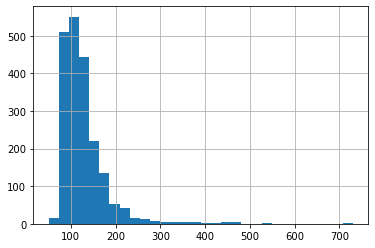

In [10]:
df.price.hist(bins=30);

In [ ]:
Заметно, что есть вбросы,поэтому нужно прологарифмировать

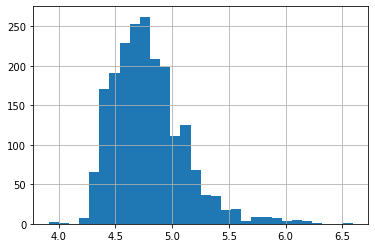

In [11]:
df['price'] = np.log(df['price'])
df.price.hist(bins=30);

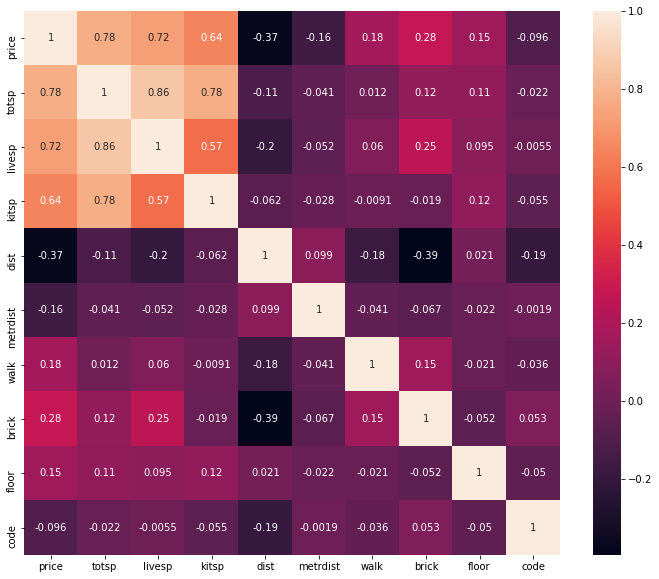

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True);

In [13]:
# Чтобы не было зависимостей от номера ветки,используется One Hot Encoding
# OHE для категориальной переменной
df_categor = pd.get_dummies(df['code'], drop_first=True, prefix='code')

# Объединили назад наши таблички
df = pd.concat([df.drop('code',axis=1),df_categor], axis=1)
df.head()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code_2,code_3,code_4,code_5,code_6,code_7,code_8
n,,,,,,,,,,,,,,,,
1,4.394449,58,40,6.0,12.5,7,1,1,1,0,1,0,0,0,0,0
2,4.317488,44,28,6.0,13.5,7,1,0,1,0,0,0,0,1,0,0
3,4.852030,70,42,6.0,14.5,3,1,1,1,0,1,0,0,0,0,0
4,4.553877,61,37,6.0,13.5,7,1,0,1,0,0,0,0,0,0,0
5,5.799093,104,60,11.0,10.5,7,0,1,1,0,1,0,0,0,0,0


In [32]:
# отделение на тест и тренировку
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3)

In [40]:
# скалирование
from sklearn.preprocessing import StandardScaler

# объявили скалировщик!
scaler = StandardScaler()

# учим скалировщик скалировать все переменны на трэйне
scaler.fit(df_train[['totsp', 'livesp', 'kitsp', 'dist', 'metrdist']]) 

StandardScaler()

In [41]:
# Применяем скалировщик к трэйну
df_train_scale = scaler.transform(df_train[['totsp', 'livesp', 'kitsp', 'dist', 'metrdist']])

# Применяем скалирвощик к тесту 
df_test_scale = scaler.transform(df_test[['totsp', 'livesp', 'kitsp', 'dist', 'metrdist']])

In [42]:
# Заменяем значения на отскалированные
df_train[['totsp', 'livesp', 'kitsp', 'dist', 'metrdist']] = df_train_scale
df_test[['totsp', 'livesp', 'kitsp', 'dist', 'metrdist']] = df_test_scale

In [43]:
df_train.head()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code_2,code_3,code_4,code_5,code_6,code_7,code_8
n,,,,,,,,,,,,,,,,
402,4.521789,-0.348247,0.813303,-1.044092,0.592895,0.475373,0,0,1,0,0,0,1,0,0,0
377,4.634729,-0.673661,-1.053894,-0.331054,-0.144531,0.475373,0,0,1,0,1,0,0,0,0,0
1046,4.653960,-0.803827,-1.053894,-0.331054,1.772778,-0.840705,1,0,0,1,0,0,0,0,0,0
1220,4.605170,-0.608578,-0.680455,-0.687573,0.297924,-0.840705,1,0,1,0,0,0,0,0,1,0
1380,4.343805,-1.194323,-1.053894,-1.044092,-1.029443,0.475373,1,0,0,0,0,0,0,0,0,1


In [44]:
print(df_train.shape) # Посмотрим на размеры трэйна и теста 
print(df_test.shape) 

(1428, 16)
(612, 16)


In [56]:
# Вытаскиваем цены и параметры квартир по разным переменным для удобства 

y_train = df_train.price 
y_test = df_test.price 

X_train = df_train.drop('price', axis=1).values
X_test = df_test.drop('price', axis=1).values

In [49]:
#константный прогноз 
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им цену всех квартир в тестовой выборке
y_pred_naive[:5]

array([4.79713147, 4.79713147, 4.79713147, 4.79713147, 4.79713147])

In [50]:
# метрика mae
from sklearn import metrics  # подгружаем метрики
metrics.mean_absolute_error(y_test, y_pred_naive)
metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_naive))  #перевод из логарифмич

32.650670382855715

In [51]:
# метрика mse
metrics.mean_squared_error(y_test, y_pred_naive)
metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive))

2775.032655484384

In [52]:
#rmse 
np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive)))

52.678578715492925

In [53]:
#mape (в проц)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred_naive)

5.128042075088888

In [54]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

In [55]:
print_metrics(y_test, y_pred_naive)

MAE: 32.650670382855715
RMSE: 52.678578715492925
MAPE: 5.128042075088888


In [58]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

In [59]:
print_metrics(y_test,y_pred_regr)

MAE: 16.230751120698734
RMSE: 28.724186354940795
MAPE: 2.3352478139656774


In [62]:
#Lasso regr
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
# Решётка для перебора параметра 
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10]}

# Объявили модель 
model_lasso = Lasso() 

# Объявили перебор 
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

# Сделали прогнозы
y_pred_lasso = grid_cv_lasso.predict(X_test)

Лучшее значение параметра: {'alpha': 0.001}


In [66]:
print_metrics(y_test,y_pred_lasso)

MAE: 16.274310134466923
RMSE: 28.68819053560365
MAPE: 2.3415192436599948
